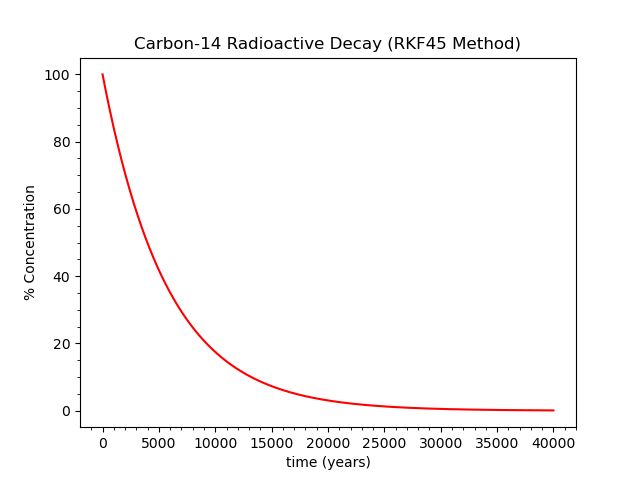

In [1]:
# rkf45_nuclear_decay.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp

atom_name = "Carbon-14"
time_scale = "years"
tau = 5730
time_final = 40_000
max_time_step = 10

# Syntax goes (Independent, List of Dependents, Other additional constants...)
def model(time, state_vector, tau):
    # state_vector: list of dependent values at any given time
    nuclei = state_vector
    d_nuclei = -nuclei / tau
    return d_nuclei


def plot(ax):

    # Initial concentration of nuclei (100%)
    time_initial = 0
    nuclei_initial = 100

    # Invoke Scipy Inital Value Problem (ivp) Solver
    sol = solve_ivp(
        # Name of function that contains diff eq (Standard to use model)
        model,
        (time_initial, time_final),
        [nuclei_initial],
        # Determing the number and frequency of readings
        max_step=max_time_step,
        # List of the additional arguments
        args=[tau],
    )

    # Pulling out only the relevant solutions
    # t is the list of independent values
    time_steps = sol.t
    # y is a 2d array of dependent values if multiple groups are produced
    nuclei_count = sol.y[0]

    ax.plot(time_steps, nuclei_count, color="red", linestyle="solid")

    ax.set_title(f"{atom_name} Radioactive Decay (RKF45 Method)")
    ax.set_xlabel(f"time ({time_scale})")
    ax.set_ylabel("% Concentration")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def simulate_decay():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


simulate_decay()

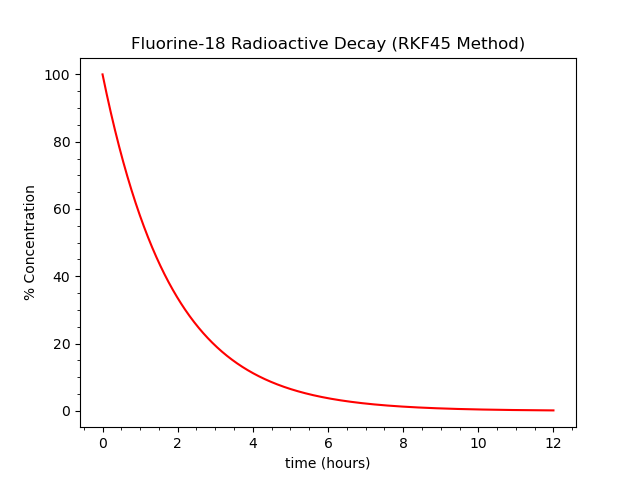

In [2]:
# Cell 2

atom_name = "Fluorine-18"
time_scale = "hours"
tau = 6586.0 / 60 / 60
time_final = 12
max_time_step = 0.01

simulate_decay()